<a href="https://colab.research.google.com/github/s-prakriti/Deep-Learning-Experiments-/blob/main/Experiment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

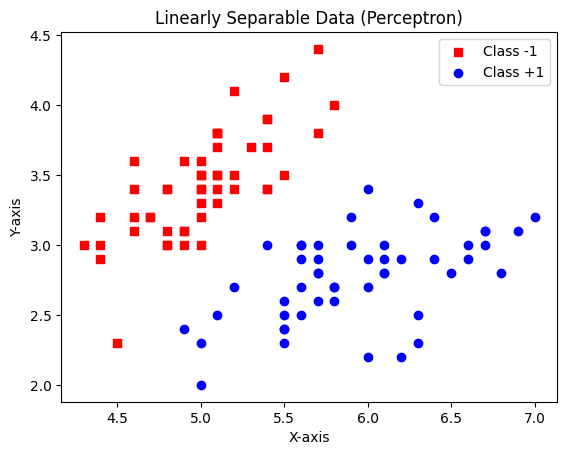

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron

np.random.seed(6)

eta = 0.01

def hypothesis_prediction(W, X):
    prediction = np.dot(W, X)
    if prediction >= 0:
        return 1
    else:
        return -1

def update_weights(weights, X, y):
    for x_i, y_i in zip(X, y):
        predicted_label = hypothesis_prediction(weights, x_i)
        error = eta * (y_i - predicted_label)
        delta_w = error * x_i
        weights = weights + delta_w
    return weights
if __name__ == "__main__":

    num_iter = 500

    iris = datasets.load_iris()

    X = iris.data[:, :2]

    y = iris.target

    y = np.where(y == 0, -1, 1)

    weights = np.zeros(X.shape[1])


    for _ in range(num_iter):
        weights = update_weights(weights, X, y)

    plt.scatter(X[:50, 0], X[:50, 1],
                c='r', marker='s',
                label='Class -1')

    plt.scatter(X[50:100, 0], X[50:100, 1],
                c='b',
                label='Class +1')

    plt.title("Linearly Separable Data (Perceptron)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='upper right')
    plt.show()


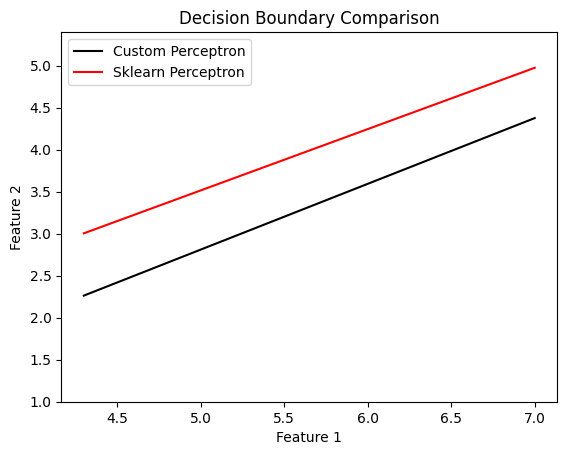

In [2]:

training_data = X[:100, :]

X_train = np.c_[np.ones(training_data.shape[0]), training_data]

y_train = y[:100]

y_train[np.where(y_train == 0)] = -1

weights = np.zeros(X_train.shape[1])

for i in range(num_iter):
    weights = update_weights(weights, X_train, y_train)

clf = Perceptron()
clf.fit(X_train, y_train)

w0, w1, w2 = clf.coef_[0]

x_min = min(X_train[:, 1])
x_max = max(X_train[:, 1])

y_min = min(X_train[:, 2])
y_max = max(X_train[:, 2])

x_axis = np.linspace(x_min, x_max)

Y = -(weights[0] + weights[1] * x_axis) / weights[2]

Y2 = -(w0 + w1 * x_axis) / w2

plt.plot(x_axis, Y, c='black', label='Custom Perceptron')
plt.plot(x_axis, Y2, c='red', label='Sklearn Perceptron')

plt.ylim(y_min - 1, y_max + 1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary Comparison")
plt.legend(loc='best')
plt.show()
